In [1]:
import pandas as pd
import geopandas as gpd

In [5]:
airport_data = pd.read_csv("data/world_airports.csv")
airport_data.sample(5)

,Country,Lat,Lon
3018,SAUDI ARABIA,24.144,38.063
2783,PERU,-3.552,-80.381
216,AUSTRALIA,-19.253,146.765
3798,USA,36.236,-115.034
142,ARGENTINA,-33.086,-64.261


# Change Pandas DataFrame to GeoPandas GeoDataFrame
## Structure of a GeoPandas GeoDataFrame
- Point could be polygon

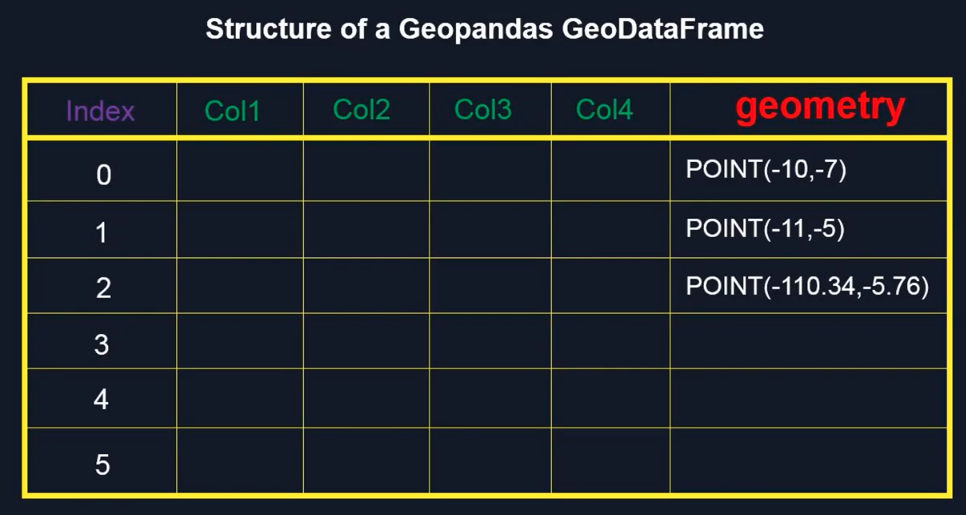



In [6]:
airport_gdf = gpd.GeoDataFrame(
        airport_data,
        geometry=gpd.points_from_xy(
            airport_data["Lon"], airport_data["Lat"]
        )
)
airport_gdf.head()

,Country,Lat,Lon,geometry
0,ACORES,-7.969,-14.394,POINT (-14.39400 -7.96900)
1,ACORES,38.883,-9.030,POINT (-9.03000 38.88300)
2,ACORES,36.971,-25.171,POINT (-25.17100 36.97100)
3,ACORES,41.868,-6.712,POINT (-6.71200 41.86800)
4,ACORES,38.079,-7.932,POINT (-7.93200 38.07900)


<AxesSubplot:>

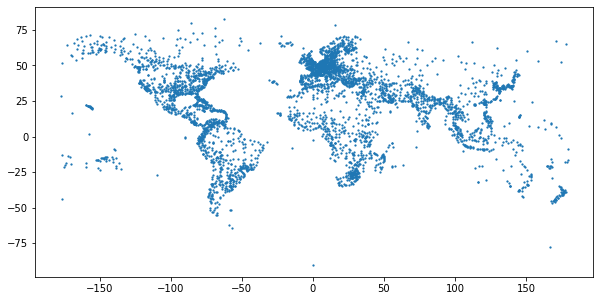

In [7]:
airport_gdf.plot(markersize=1.5, figsize=(10, 20))

In [8]:
airport_gdf.shape

(4188, 4)

In [14]:
airport_gdf = airport_gdf.set_crs(epsg=4326)
airport_gdf.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

# Save GeoDataFrame to ESRI shapefile

### ESRI WKT
- EPSG 4326
- https://epsg.io/4326

### Create shape file
- **crs_wkt=ESRI_WKT** for creating prj file

In [16]:
airport_gdf.to_file(filename="shp/airport.shp",   driver="ESRI Shapefile" )